# Classification Model for Heart Disease Prediction

In this Machine Learning Project, we will be analysing the dataset taken from www.kaggle.com related to details of patients. This data consists of features like age, sex, chest pain type, blood pressure and many more. Our focus will be on analysing the data, getting the insights related to these features and there role in affecting the target, we will perform feature engineering, feature selection and develop a Classification model that will predict whether the patient has a heart disease or not.

## Importing the Important Libraries required

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

pd.set_option('display.max_columns', None)

## Reading the 'heart_disease.csv' Dataset

In [2]:
# reading dataset as DataFrame by pandas
heart_df = pd.read_csv('heart_disease.csv') 

In [3]:
# observing the data that we have
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


It can be observed that in total we have 303 rows and 14 columns(features) i.e age, sex, chest_pain_type, resting_blood_pressure, cholesterol, fasting_blood_sugar, rest_ecg, max_heart_rate_achieved, exercise_induced_angina, st_depression, st_slope, num_major_vessels, thalassemia, target

Understanding the features in Dataset

- age: The person's age in years
- sex: The person's sex (1 = male, 0 = female)
- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
- chol: The person's cholesterol measurement in mg/dl
- fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or      definite left ventricular hypertrophy by Estes' criteria)
- thalach: The person's maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: The number of major vessels (0-3)
- thal: A blood disorder called thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect)
- target: Heart disease (0 = no, 1 = yes)

## Observing the Correlation between the features

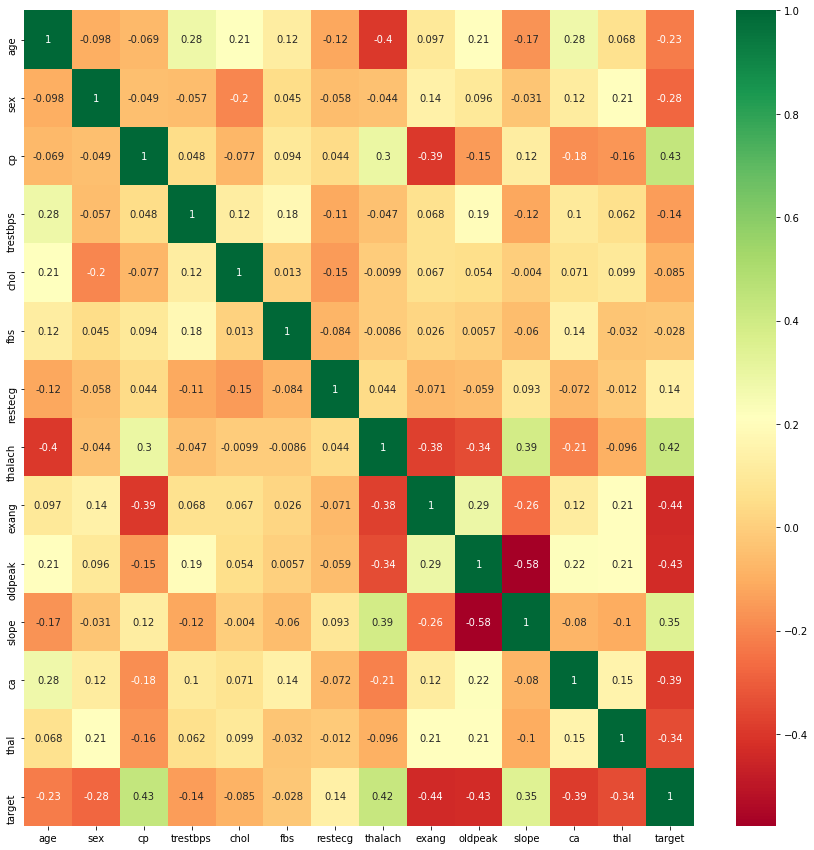

In [4]:
# plotting a Heatmap

corrmat = heart_df.corr()
features = corrmat.index
plt.figure(figsize = [15,15])

g = sns.heatmap(heart_df[features].corr(),annot = True, cmap = "RdYlGn")

Here we can simply observe the the correlations or impact that the features have on the Target feature. Based on our requirements and use case we select what all features we need to consider to train our model.

## Observing the distribution of the features

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

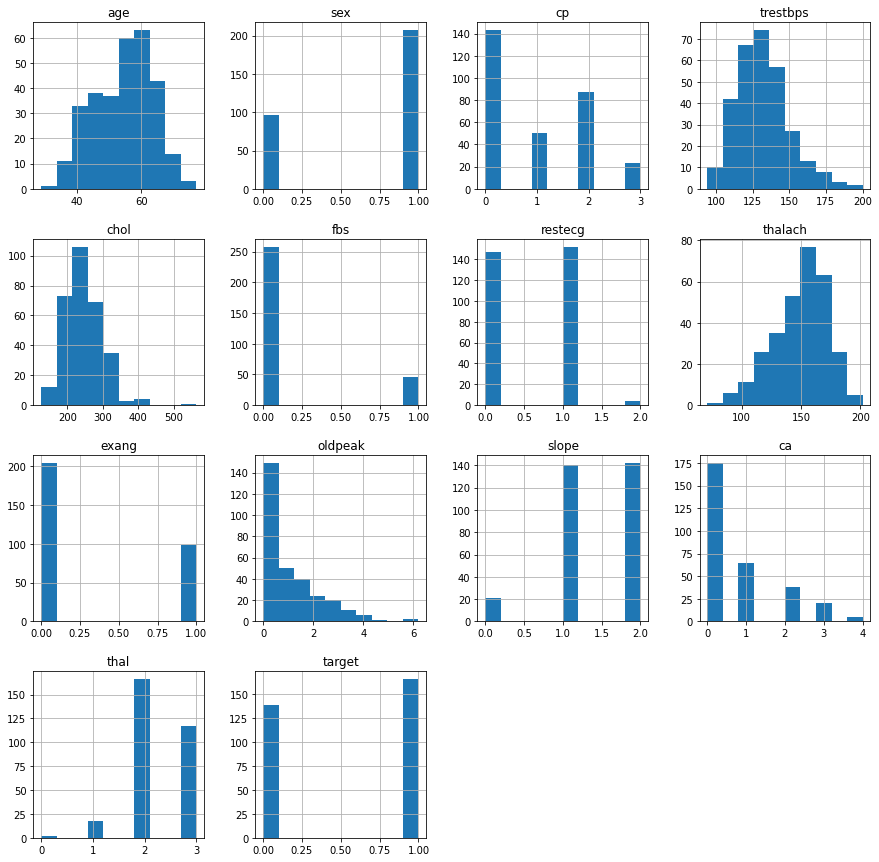

In [5]:
heart_df.hist(figsize=(15,15))

We can clearly observe by observing the distribution graph for target that our dataset is balanced so we dont need to perform undersampling or over sampling.

We dont need to perform Featuer Scaling as well, because we are using ADABoost Classifier for training our model.

## Data Preprocessing

In [6]:
# Renaming all the columns of the dataset to convenient and understandable names

heart_df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 
              'exercise_induced_angina', 'st_depression', 
              'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [7]:
# Changing categorcial data to 'string' type categorical data 

heart_df['sex'][heart_df['sex'] == 0] = 'female'
heart_df['sex'][heart_df['sex'] == 1] = 'male'

heart_df['chest_pain_type'][heart_df['chest_pain_type'] == 0] = 'absence'
heart_df['chest_pain_type'][heart_df['chest_pain_type'] == 1] = 'typical angina'
heart_df['chest_pain_type'][heart_df['chest_pain_type'] == 2] = 'atypical angina'
heart_df['chest_pain_type'][heart_df['chest_pain_type'] == 3] = 'non-anginal pain'
heart_df['chest_pain_type'][heart_df['chest_pain_type'] == 4] = 'asymptomatic'

heart_df['fasting_blood_sugar'][heart_df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
heart_df['fasting_blood_sugar'][heart_df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

heart_df['rest_ecg'][heart_df['rest_ecg'] == 0] = 'normal'
heart_df['rest_ecg'][heart_df['rest_ecg'] == 1] = 'ST-T wave abnormality'
heart_df['rest_ecg'][heart_df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

heart_df['exercise_induced_angina'][heart_df['exercise_induced_angina'] == 0] = 'no'
heart_df['exercise_induced_angina'][heart_df['exercise_induced_angina'] == 1] = 'yes'

heart_df['st_slope'][heart_df['st_slope'] == 0] = 'absence'
heart_df['st_slope'][heart_df['st_slope'] == 1] = 'upsloping'
heart_df['st_slope'][heart_df['st_slope'] == 2] = 'flat'
heart_df['st_slope'][heart_df['st_slope'] == 3] = 'downsloping'

heart_df['thalassemia'][heart_df['thalassemia'] == 1] = 'normal'
heart_df['thalassemia'][heart_df['thalassemia'] == 2] = 'fixed defect'
heart_df['thalassemia'][heart_df['thalassemia'] == 3] = 'reversable defect'

c:\users\prank\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\prank\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\prank\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

In [8]:
# Observing the Dataset
heart_df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,absence,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,absence,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,absence,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


In [9]:
# understanding the features that we have in the dataset
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    object 
 2   chest_pain_type          303 non-null    object 
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    object 
 6   rest_ecg                 303 non-null    object 
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    object 
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    object 
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    object 
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(6), o

We can observe that in our dataset we are having only numerical features.

In [10]:
# Checking for Nan Values in features
heart_df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

The features dont contain any missing values so we dont need to handle any 'Nan' values.

## Encoding Categorical Features

In [11]:
columns = [c for c in heart_df.columns if c not in ['target']]
heart_x = heart_df[columns]
heart_y = heart_df['target']

In [12]:
print(heart_x.shape,' ',heart_y.shape)

(303, 13)   (303,)


In [13]:
# creating a list of categorical features
cat_feat = [features for features in heart_x.columns if heart_x[features].dtype == 'O']
print(cat_feat)

['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'thalassemia']


In [14]:
for feature in cat_feat:
    print("Cardinality of {} : {}".format(feature, heart_x[feature].nunique()))
    print("Unique values of {} : {}".format(feature, heart_x[feature].unique()))
    print('')

Cardinality of sex : 2
Unique values of sex : ['male' 'female']

Cardinality of chest_pain_type : 4
Unique values of chest_pain_type : ['non-anginal pain' 'atypical angina' 'typical angina' 'absence']

Cardinality of fasting_blood_sugar : 2
Unique values of fasting_blood_sugar : ['greater than 120mg/ml' 'lower than 120mg/ml']

Cardinality of rest_ecg : 3
Unique values of rest_ecg : ['normal' 'ST-T wave abnormality' 'left ventricular hypertrophy']

Cardinality of exercise_induced_angina : 2
Unique values of exercise_induced_angina : ['no' 'yes']

Cardinality of st_slope : 3
Unique values of st_slope : ['absence' 'flat' 'upsloping']

Cardinality of thalassemia : 4
Unique values of thalassemia : ['normal' 'fixed defect' 'reversable defect' 0]



As the Cardinality of these categorical variables is less so we can easily encode these features by One Hot Encoding.

In [15]:
# Encoding the categorical features 
for feature in cat_feat:
    encoded = pd.get_dummies(heart_x[feature], prefix = feature, drop_first = True)
    heart_x.drop(feature, axis = 1, inplace = True)
    heart_x = pd.concat([heart_x, encoded], axis = 1)

c:\users\prank\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
# observing the data after encoding
heart_x.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,0,0,0,0,1,0,0,1,1,0,1,0,0


## Splitting Dataset into Train and Test Data

In [17]:
# splitting data into train and test

x_train,x_test,y_train,y_test = train_test_split(heart_x, heart_y, test_size = 0.3, random_state = 10)
print(x_train.shape,' ',y_train.shape)
print(x_test.shape,' ',y_test.shape)

(212, 19)   (212,)
(91, 19)   (91,)


## Building our Classification Model

In [18]:
# creating a default ADABoost Classifier and fitting it with x_train and y_train data
ada_model = AdaBoostClassifier()
ada_model.fit(x_train, y_train)

AdaBoostClassifier()

In [19]:
# predicting the x_test results
predictions = ada_model.predict(x_test)

In [20]:
# accuracy score for predictions made on test data
print(metrics.accuracy_score(y_test, predictions))

0.8241758241758241


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

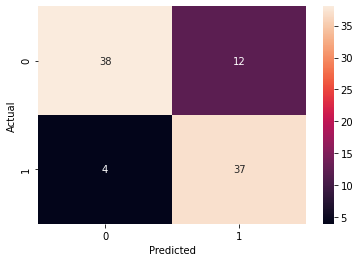

In [21]:
# creating a confusion matrix to evaluate our model

confusion_matrix = pd.crosstab(y_test, predictions, rownames = {'Actual'}, colnames = {'Predicted'})
sns.heatmap(confusion_matrix, annot = True)

It can be observed that by ADABoostClassifier we are getting a good accuracy of >80% with a good confusion matrix in which we are getting good values of True Positive and True Negative, as in case of a disease our aim is to reduce Type 2 error or False Negative and we are getting results for that as well, we can enhance our model by hyperparameter tuning to reduce Type 2 error further.